# First ML Model: Decision Trees

In this notebook we start working on Classification problems, one of the most important tasks within Machine Learning (within what we call Supervised Learning). Classification in Machine Learning consists on learning discrete labels "y" from a set of features "X" (which can be one, two, or many more) taking as a sample a set of instances.

In this notebook we will work with one of the fundamental models of Machine Learning: Decision Trees. For this, we will use the Titanic dataset and the Scikit-Learn library. Due to the object-oriented implementation of Scikit-Learn, **all models are trained and used in the same way**.

Remember that all the libraries were developed by people who, in search of solving a computational need, wrote the code that today we can reuse so that we can get straight to work instead of having to develop and optimize it over and over again. However, the idea I want to convey to you is that you can try to write yourself the functions and classes that we will import from the libraries. While this is not the usual thing to do and will certainly be much more time consuming, this work will allow you to understand new details about what you are doing. 

The Titanic dataset is famous among Data Science students. It has emerged from a competition on the Kaggle site: [Machine Learning from Disaster](https://www.kaggle.com/c/titanic). We will see a very simple implementation of a possible approach to solve it, starting also from a simplified and filtered version of the original dataset of this competition.

Our Dataset is composed of a series of columns, which have the following meanings:

1.   **Survivor**: `0` = No; `1` = Yes
2.   **Class**: `1` = First Class; `2` = Second Class; `3` = Third Class
3.   **Gender**: `0` = Male; `1` = Female
4.   **Age**: age in years
5.   **SibSpou**: number of siblings or spouses on board Titanic, for the passenger in question.
6.   **ParChil**: number of parents or children on board the Titanic, for the passenger in question.

**Exercise:** Load the Titanic dataset and take some time to study its characteristics. 

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import tree

In [ ]:
# link disk
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read csv file "/content/drive/MyDrive/Total Python Colab Notebooks/DataSet_Titanic.csv"
df = pd.read_csv("/content/drive/MyDrive/Total Python Colab Notebooks/DataSet_Titanic.csv")

In [ ]:
# display first 5 rows
df.head()

,Survivor,Class,Gender,Age,SibSpou,ParChil
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


Decision tree: as a first approximation, we will say that it is an object that, given several instances with a given set of features `X` and a given set of target labels `y`, the decision tree automatically learns rules (from most to least important) about each feature in order to decide which label corresponds to each instance.

Let's separate the Titanic dataset in:
1. An `X` variable with the attributes you will use to predict,
2. An `y` variable with the label you want to predict. In this case, whether it survived or not.

In [ ]:
# store in variable X the predictor attributes (all the labels except "Survivor")
X = df.drop('Survivor', axis=1)

# store in y the label to predict ("Survivor")
y = df.Survivor

In [ ]:
# display X
X.head()

,Class,Gender,Age,SibSpou,ParChil
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


In [ ]:
# display y
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survivor, dtype: int64

If we want to train a decision tree to classify our instances, we must first create an object corresponding to the model. This object will be of the DecisionTreeClassifier class, which we import from the Scikit-Learn library. 

In [ ]:
# We create a tree object
my_tree = DecisionTreeClassifier(max_depth=3, random_state=42)

So far, all we did was create the object, nothing else.

Once our model was created, we need to train it on our data. We do this with the **fit(...)** method that ***all*** Scikit-Learn model classes have.

In [ ]:
# we train the machine
my_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

What happened?

The model is already trained. This means that we have a tool that, given certain characteristics of an instance, gives us back which `y` tag the model thinks corresponds to it. We can do this by using the **predict(...)** method, which also has ***all*** classes corresponding to **Scikit-Learn** models.

We might then ask ourselves: what is the percentage of instances well classified by the model? To answer this we will again use the **predict** method on the whole dataset `X`. Then with the `accuracy_score` function we can calculate the percentage of hits we get by comparing our prediction `y_pred` against the original class `y`. We recommend to look at the documentation of this function, for now we will simply say that it is one of the many metrics that we use to evaluate our models, and what it does is to return us a percentage of successes.

In [ ]:
# We predict on our set
prediction_y = my_tree.predict(X)

# We compare with the real labels
print("Accuracy: ", accuracy_score(prediction_y, y))

Accuracy:  0.8151260504201681


This means that the classifier assigns the correct label in 80.25% of the cases.

Another way to view the results of our classifier is the confusion matrix. The confusion matrix is a double-entry table, where one axis corresponds to the actual label (y) and the other to the predicted label (pred_y). On the diagonal we find the hits, while outside the diagonal we find the misclassified instances. Again, we recommend to see the documentation.

In [ ]:
# we create a confusion matrix
confusion_matrix(y, prediction_y)

array([[372,  52],
       [ 80, 210]])

A more interesting way to view this information is with the plot_confusion_matrix function:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


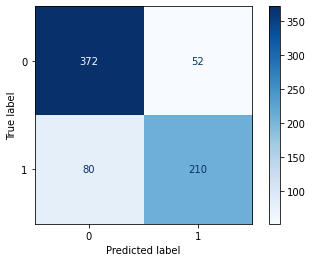

In [ ]:
# we create a graph for the confusion matrix
plot_confusion_matrix(my_tree, X, y, cmap= plt.cm.Blues, values_format='.0f')

Or we can obtain a normalized version (with values between 0 and 1, or in other words, the percentage):

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


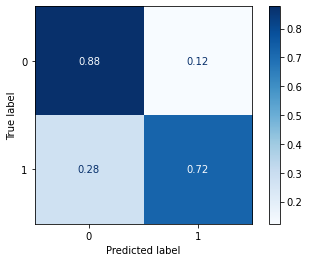

In [ ]:
# we create a graph for the normalized confusion matrix
plot_confusion_matrix(my_tree, X, y, cmap= plt.cm.Blues, values_format='.2f', normalize='true')

We can graphically display the decision tree that was automatically generated when training the model, to get a better understanding of our data and how the model works. The most important variables (those that were most useful to classify the different instances of the dataset), appear at the top, and depending on the values assumed, each instance will be classified into different branches, after which the tree is again asked a question based on the values assumed by this instance of a given feature.

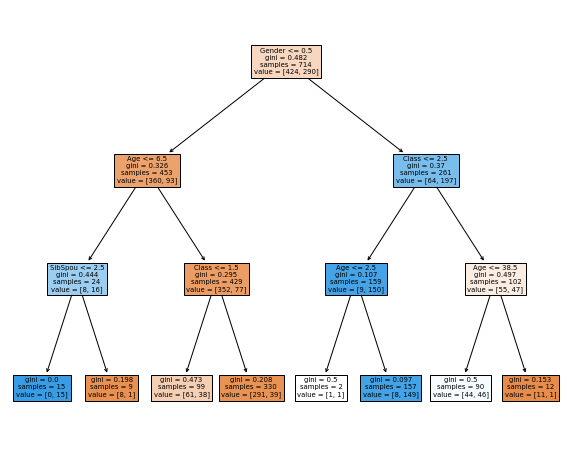

In [ ]:
# we show a tree graphically
plt.figure(figsize= (10, 8))
tree.plot_tree(my_tree, filled= True, feature_names= X.columns)
plt.show()

The left branch represents the true result, while the right branch represents the false result. I give you another clue to interpret the model: the color of each rectangle represents the label predicted by the model (in our case, the blue label represents "survives", or a value of y=1, and the orange, "does not survive", or a value of y=0). 

In turn, the hue represents how confident the model is in its prediction. From the training, the model learned some rules to classify the instances according to the values assumed for certain features. This classification, however, contains errors, since this division may result in a proportion (the smaller the better) of instances being incorrectly classified, since in reality they belong to the other category. The number of incorrectly classified instances is mathematically processed in an indicator known as "Gini impurity", which measures the number of incorrectly classified instances within each "leaf" of the tree. It reaches the minimum value of zero when there are no misclassified instances. This information exists in our tree graph, and in turn determines the color of the leaf, being more intense when the "Gini impurity" value is lower, meaning that the classification of that leaf is more robust to correctly predicting an outcome.

We can see that our model has learned some very interesting things:


* The first question our model asks, is about the sex of the person: if he is male (0) then his age is asked. If he is a male aged 7 years or older, it assigns him a label of "no survivor". On the contrary, if he is a boy aged 6 years or younger, it will predict "survives."
* The case is different if, as a result of the first question, the sex value was 1 (female). The next question the tree will ask is referred to what class the passenger belonged to: if she was 1st or 2nd class, it will assign the prediction "survives", and if she was 3rd class, "does not survive".

Unfortunately it is not a happy event, and we have the data to show that there have been human losses. The model is not biased about this, but has automatically learned from the data to explain how the events occurred. Think about how this relates to the historical events surrounding the sinking of the Titanic - are you familiar with the phrase **"Women and children first "**, as they jumped into the lifeboats? The model has found that women had a better chance of survival (and the wealthier they were, the better their chances), and that in the case of men, young children were luckier than teenagers or adults.

Another useful visualization, more synthetic than the previous one, is the possibility of plotting the importance of each variable in the prediction obtained. This importance is given by Scikit-Learn to each feature (x) according to how useful it has been to classify the instances.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


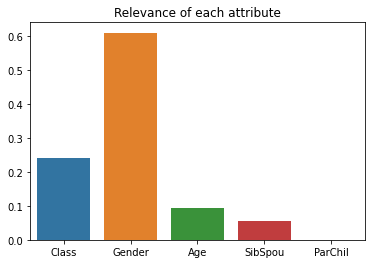

In [ ]:
# we plot the importances in a bar chart
# we create the variables x (amounts) and y (columns)
relevance = my_tree.feature_importances_
columns = X.columns

# create the graph
sns.barplot(columns, relevance)
plt.title("Relevance of each attribute")
plt.show()

According to the above graph, the most determining factor was gender, followed by passenger class, and then age. Complemented with the previous diagram, we could see how the variables influenced each other to determine the possibility of survival according to the person's gender.

The next step in a data scientist's process would be to optimize their machine learning model to try to achieve higher accuracy. Keep in mind that reaching 100% accuracy is generally not realistic in any real project, but an acceptable threshold is usually between 85% and 95%, depending on the complexity of the dataset and the models already available (a more complex model will be worthwhile only if it gets better results than a simple model).

1. Experiment with different depths and visualize the tree obtained with the `plot_tree` function of the `tree` module of Scikit-Learn.
1. Evaluates its performance by calculating the accuracy and viewing its confusion matrix.
1. Observe the importance assigned to each attribute (`feature_importances_`). In the documentation you will find information that may be useful to improve the results obtained.


What else can you learn from the Titanic tragedy by looking at the decision tree and the importance of each feature?

In [ ]:
miGini = my_tree.feature_importances_

In [ ]:
miGini

array([0.24197753, 0.6095886 , 0.09424723, 0.05418664, 0.        ])